Excercicio 1

Os cinco primeiros números gerados são: [ 6  1  8 11 10]
O período do gerador é: 16

Gerando gráfico da sequência:


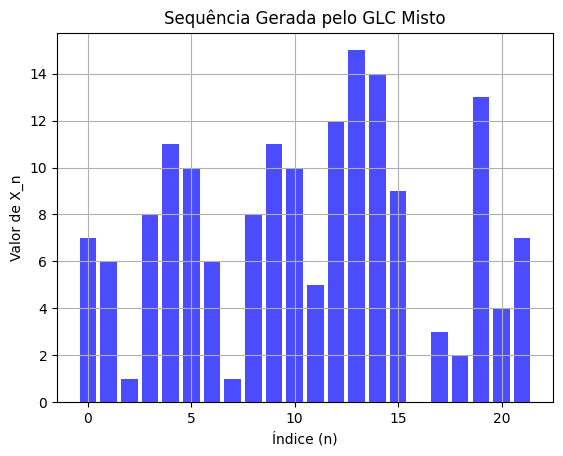

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do GLC
a = 5
c = 3
m = 16
X = 7  # Valor inicial X0
# Parte a) Calcular os cinco primeiros números gerados
x_sequence = np.array([X])  # Array para armazenar a sequência, começando com X0
# Geramos os próximos 5 números (X1 a X5)
for i in range(5):
    X = (a * X + c) % m  # Fórmula do GLC: (a * X + c) mod m
    x_sequence = np.append(x_sequence, X)

# Os cinco primeiros números gerados são X1 a X5
first_five = x_sequence[1:6]  # Pegamos de X1 a X5
print(f"Os cinco primeiros números gerados são: {first_five}")
# Parte b) Determinar o período do gerador
seen_values = {}  # Dicionário para rastrear valores e índices
X = x_sequence[0]  # Reiniciamos X para X0
index = 0
max_iterations = 50  # Limite para evitar loops infinitos
# Continuamos gerando a sequência até encontrar uma repetição
while index < max_iterations:
    if X in seen_values:
        period = index - seen_values[X]
        print(f"O período do gerador é: {period}")
        break
    seen_values[X] = index
    X = (a * X + c) % m
    x_sequence = np.append(x_sequence, X)
    index += 1
# Visualização gráfica da sequência
print("\nGerando gráfico da sequência:")
indices = np.arange(len(x_sequence))  # Índices para o eixo x
plt.bar(indices, x_sequence, color='blue', alpha=0.7)
plt.xlabel('Índice (n)')
plt.ylabel('Valor de X_n')
plt.title('Sequência Gerada pelo GLC Misto')
plt.grid(True)
plt.show()

Exercicio 2

In [7]:
import numpy as np
import math
print("Abordagem Analítica")
# Parâmetros do problema
lambda_ = 3  # Taxa média de chamadas por minuto

# Função para calcular a probabilidade de Poisson P(X = k)
# P(X = k) = (lambda^k * e^(-lambda)) / k!
def poisson_prob(lambda_, k):
    return (lambda_ ** k) * np.exp(-lambda_) / math.factorial(k)

# Parte a) Probabilidade de exatamente 5 chamadas (P(X = 5))
k = 5
prob_exactly_5 = poisson_prob(lambda_, k)
print(f"Parte a) Probabilidade de exatamente 5 chamadas: {prob_exactly_5:.4f}")

# Parte b) Probabilidade de no máximo 2 chamadas (P(X <= 2))
# P(X <= 2) = P(X = 0) + P(X = 1) + P(X = 2)
prob_at_most_2 = sum(poisson_prob(lambda_, k) for k in range(3))  # k = 0, 1, 2
print(f"Parte b) Probabilidade de no máximo 2 chamadas: {prob_at_most_2:.4f}")

Abordagem Analítica
Parte a) Probabilidade de exatamente 5 chamadas: 0.1008
Parte b) Probabilidade de no máximo 2 chamadas: 0.4232


In [8]:
import numpy as np
print("Abordagem por Simulação")
# Parâmetros do problema
lambda_ = 3  # Taxa média de chamadas por minuto
N = 100000  # Número de amostras (aumentamos para maior precisão)

# Gerar amostras da distribuição de Poisson usando o método inverso
av = np.array([])  # Array para armazenar as amostras
x = np.random.uniform(0, 1, N)  # N números aleatórios uniformes entre 0 e 1

for ix in x:
    i = 0
    pr = np.exp(-lambda_)  # P(X = 0) = e^(-lambda)
    F = pr  # Função de distribuição acumulada (CDF)
    while ix >= F:
        i += 1
        pr = (lambda_ / i) * pr  # P(X = i) = (lambda / i) * P(X = i-1)
        F += pr  # Atualiza a CDF
    av = np.append(av, i)

# Parte a) Estimar a probabilidade de exatamente 5 chamadas
count_exactly_5 = np.sum(av == 5)  # Conta quantas vezes X = 5
prob_exactly_5_sim = count_exactly_5 / N
print(f"Probabilidade simulada de exatamente 5 chamadas: {prob_exactly_5_sim:.4f}")

# Parte b) Estimar a probabilidade de no máximo 2 chamadas
count_at_most_2 = np.sum(av <= 2)  # Conta quantas vezes X <= 2
prob_at_most_2_sim = count_at_most_2 / N
print(f"Probabilidade simulada de no máximo 2 chamadas: {prob_at_most_2_sim:.4f}")

Abordagem por Simulação
Probabilidade simulada de exatamente 5 chamadas: 0.1001
Probabilidade simulada de no máximo 2 chamadas: 0.4234


Exercicio 3

In [9]:
import math
print("Abordagem Analítica")
# Parâmetros do problema
n = 10  # Número de questões
p = 0.25  # Probabilidade de acerto em cada questão
q = 1 - p  # Probabilidade de erro

# Função para calcular o coeficiente binomial (n choose k)
def binomial_coefficient(n, k):
    return math.comb(n, k)  # math.comb calcula n! / (k! * (n-k)!)

# Função para calcular a probabilidade binomial P(X = k)
def binomial_prob(n, p, k):
    return binomial_coefficient(n, k) * (p ** k) * (q ** (n - k))

# Parte a) Probabilidade de acertar exatamente 3 questões (P(X = 3))
prob_exactly_3 = binomial_prob(n, p, 3)
print(f"Parte a) Probabilidade de acertar exatamente 3 questões: {prob_exactly_3:.4f}")

# Parte b) Probabilidade de acertar no máximo 2 questões (P(X <= 2))
prob_at_most_2 = sum(binomial_prob(n, p, k) for k in range(3))  # P(X = 0) + P(X = 1) + P(X = 2)
print(f"Parte b) Probabilidade de acertar no máximo 2 questões: {prob_at_most_2:.4f}")

# Parte c) Média e desvio padrão
mean = n * p  # Média: E[X] = n * p
variance = n * p * q  # Variância: Var(X) = n * p * (1 - p)
std_dev = math.sqrt(variance)  # Desvio padrão: sqrt(Var(X))
print(f"Parte c) Média: {mean:.1f}, Desvio padrão: {std_dev:.4f}")

Abordagem Analítica
Parte a) Probabilidade de acertar exatamente 3 questões: 0.2503
Parte b) Probabilidade de acertar no máximo 2 questões: 0.5256
Parte c) Média: 2.5, Desvio padrão: 1.3693


In [1]:
import numpy as np
print("Abordagem por Simulação")
# Parâmetros do problema
p = 0.25  # Probabilidade de acerto
q = 1 - p  # Probabilidade de erro (0.75)
n = 10  # Número de questões
N = 100000  # Número de amostras (aumentamos para maior precisão)
# Constante c para o método da transformada inversa
c = p / (1 - p)  # c = p / q
# Array para armazenar as amostras
av = np.array([])
# Gerar N números aleatórios uniformes entre 0 e 1
x = np.random.uniform(0, 1, N)
# Simulação usando o método da transformada inversa
for ix in x:
    i = 0
    pr = (1 - p) ** n  # P(X = 0) = (1-p)^n
    F = pr  # Função de distribuição acumulada (CDF)
    while ix >= F:
        pr = (c * (n - i) / (i + 1)) * pr  # P(X = i+1) = (c * (n-i)/(i+1)) * P(X = i)
        F = F + pr
        i = i + 1
    av = np.append(av, i)
# Parte a) Estimar a probabilidade de acertar exatamente 3 questões
count_exactly_3 = np.sum(av == 3)
prob_exactly_3_sim = count_exactly_3 / N
print(f"Parte a) Probabilidade simulada de acertar exatamente 3 questões: {prob_exactly_3_sim:.4f}")

# Parte b) Estimar a probabilidade de acertar no máximo 2 questões
count_at_most_2 = np.sum(av <= 2)
prob_at_most_2_sim = count_at_most_2 / N
print(f"Parte b) Probabilidade simulada de acertar no máximo 2 questões: {prob_at_most_2_sim:.4f}")

# Parte c) Média e desvio padrão das amostras
mean_sim = np.mean(av)
std_dev_sim = np.std(av)
print(f"Parte c) Média simulada: {mean_sim:.1f}, Desvio padrão simulado: {std_dev_sim:.4f}")

Abordagem por Simulação
Parte a) Probabilidade simulada de acertar exatamente 3 questões: 0.2510
Parte b) Probabilidade simulada de acertar no máximo 2 questões: 0.5264
Parte c) Média simulada: 2.5, Desvio padrão simulado: 1.3653


Exercicio 4

Abordagem Analítica
Probabilidade exata de ao menos 3 falhas em uma semana: 0.5768


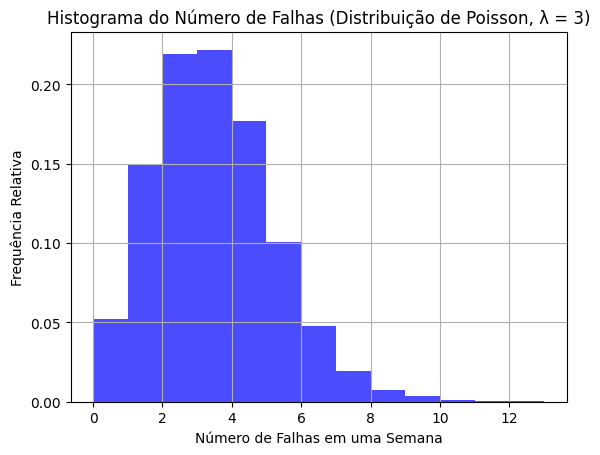

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Importamos o módulo math diretamente
print("Abordagem Analítica")
# Parâmetros do problema
lambda_2_weeks = 6  # Taxa média para 2 semanas
lambda_week = lambda_2_weeks / 2  # Taxa média por semana

# Função para calcular a probabilidade de Poisson
def poisson_prob(lambda_, k):
    return (lambda_ ** k) * np.exp(-lambda_) / math.factorial(k)  # Usamos math.factorial

# Calcular P(X >= 3)
prob_less_than_3 = sum(poisson_prob(lambda_week, k) for k in range(3))  # P(X = 0) + P(X = 1) + P(X = 2)
prob_at_least_3 = 1 - prob_less_than_3
print(f"Probabilidade exata de ao menos 3 falhas em uma semana: {prob_at_least_3:.4f}")

# Gerar amostras para o histograma
N = 10000
samples = np.random.poisson(lambda_week, N)

# Traçar o histograma
plt.hist(samples, bins=range(int(min(samples)), int(max(samples)) + 2), density=True, alpha=0.7, color='blue')
plt.xlabel('Número de Falhas em uma Semana')
plt.ylabel('Frequência Relativa')
plt.title('Histograma do Número de Falhas (Distribuição de Poisson, λ = 3)')
plt.grid(True)
plt.show()

Abordagem por Simulação
Probabilidade simulada de ao menos 3 falhas em uma semana: 0.5764


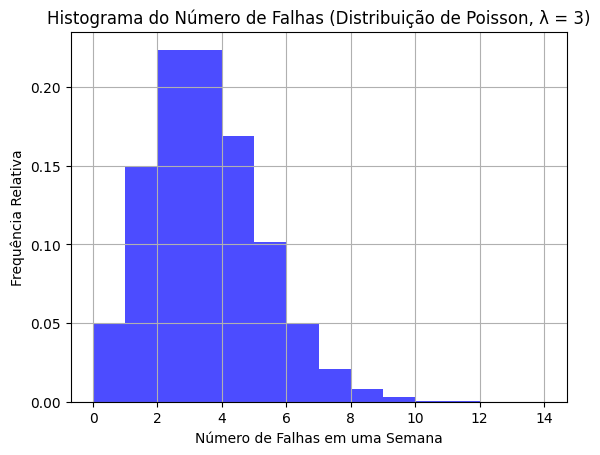

In [11]:
import numpy as np
import matplotlib.pyplot as plt
print("Abordagem por Simulação")
# Parâmetros do problema
lambda_2_weeks = 6  # Taxa média para 2 semanas
lambda_week = lambda_2_weeks / 2  # Taxa média por semana
N = 100000  # Número de amostras para a simulação

# Gerar amostras da distribuição de Poisson usando o método da transformada inversa
av = np.array([])  # Array para armazenar as amostras
x = np.random.uniform(0, 1, N)  # N números aleatórios uniformes entre 0 e 1

for ix in x:
    i = 0
    pr = np.exp(-lambda_week)  # P(X = 0) = e^(-lambda)
    F = pr  # Função de distribuição acumulada (CDF)
    while ix >= F:
        pr = (lambda_week / (i + 1)) * pr  # P(X = i+1) = (lambda / (i+1)) * P(X = i)
        F += pr
        i += 1
    av = np.append(av, i)

# Calcular a probabilidade simulada de ao menos 3 falhas
count_at_least_3 = np.sum(av >= 3)
prob_at_least_3_sim = count_at_least_3 / N
print(f"Probabilidade simulada de ao menos 3 falhas em uma semana: {prob_at_least_3_sim:.4f}")

# Traçar o histograma da variável analisada
plt.hist(av, bins=range(int(min(av)), int(max(av)) + 2), density=True, alpha=0.7, color='blue')
plt.xlabel('Número de Falhas em uma Semana')
plt.ylabel('Frequência Relativa')
plt.title('Histograma do Número de Falhas (Distribuição de Poisson, λ = 3)')
plt.grid(True)
plt.show()

Exercicio 5


b) Probabilidade do tempo de espera ser inferior a 1 minuto:
   Simulação: 0.3926
   Valor analítico: 0.3935

c) Probabilidade do tempo de espera ser superior a 4 minutos:
   Simulação: 0.1353
   Valor analítico: 0.1353


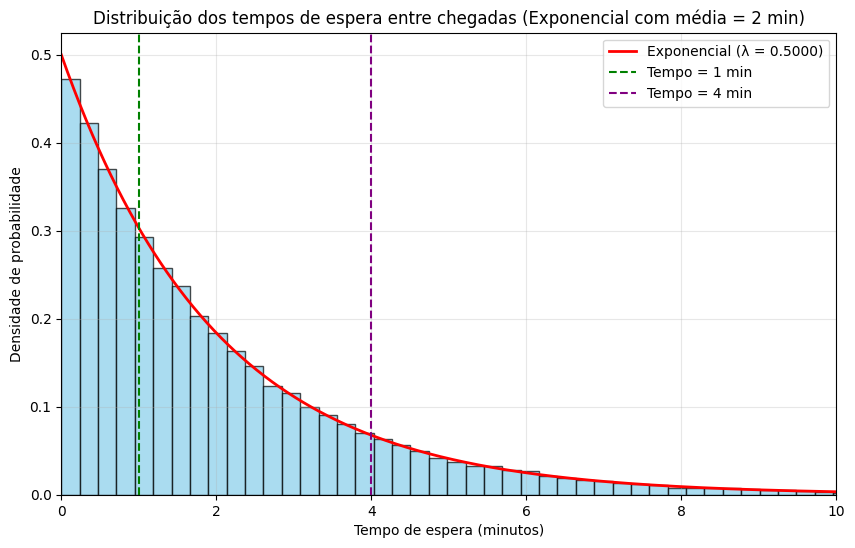

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
media = 2  # Média de 2 minutos entre chegadas sucessivas
lambda_taxa = 1/media  # Taxa da distribuição exponencial (λ = 1/média)
N = 100000  # Número de simulações

# Gerar amostras da distribuição exponencial
x = np.random.uniform(0, 1, N)
tempos_espera = -np.log(x)/lambda_taxa

# b) Probabilidade do tempo de espera ser inferior a 1 minuto
valor_b = 1  # 1 minuto
count_b = 0
for tempo in tempos_espera:
    if tempo <= valor_b:
        count_b += 1
prob_b = count_b/N

print("\nb) Probabilidade do tempo de espera ser inferior a 1 minuto:")
print(f"   Simulação: {prob_b:.4f}")
prob_analitica_b = 1 - np.exp(-lambda_taxa * valor_b)
print(f"   Valor analítico: {prob_analitica_b:.4f}")

# c) Probabilidade do tempo de espera ser superior a 4 minutos
valor_c = 4  # 4 minutos
count_c = 0
for tempo in tempos_espera:
    if tempo > valor_c:
        count_c += 1
prob_c = count_c/N

print("\nc) Probabilidade do tempo de espera ser superior a 4 minutos:")
print(f"   Simulação: {prob_c:.4f}")
prob_analitica_c = np.exp(-lambda_taxa * valor_c)  # P(X > x) = e^(-λx)
print(f"   Valor analítico: {prob_analitica_c:.4f}")

# Visualização dos resultados
plt.figure(figsize=(10, 6))

# Histograma dos tempos de espera
plt.hist(tempos_espera, bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Curva teórica da distribuição exponencial
x_plot = np.linspace(0, 10, 1000)
y_plot = lambda_taxa * np.exp(-lambda_taxa * x_plot)
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label=f'Exponencial (λ = {lambda_taxa:.4f})')

# Linhas verticais para os valores de interesse
plt.axvline(x=valor_b, color='green', linestyle='--',
            label=f'Tempo = {valor_b} min')
plt.axvline(x=valor_c, color='purple', linestyle='--',
            label=f'Tempo = {valor_c} min')

# Formatação do gráfico
plt.grid(alpha=0.3)
plt.xlabel('Tempo de espera (minutos)')
plt.ylabel('Densidade de probabilidade')
plt.title('Distribuição dos tempos de espera entre chegadas (Exponencial com média = 2 min)')
plt.legend()
plt.xlim(0, 10)
plt.show()


Exercicio 6


a) Probabilidade de ganhar exatamente no terceiro lançamento:
   Simulação: 0.1143
   Valor teórico: 0.1157

b) Probabilidade de precisar lançar o dado pelo menos 4 vezes:
   Simulação: 0.5804
   Valor teórico: 0.5787

c) Estatísticas da variável aleatória X:
   Média (simulação): 6.0304
   Média (teórica): 6.0000
   Desvio padrão (simulação): 5.5114
   Desvio padrão (teórico): 5.4772


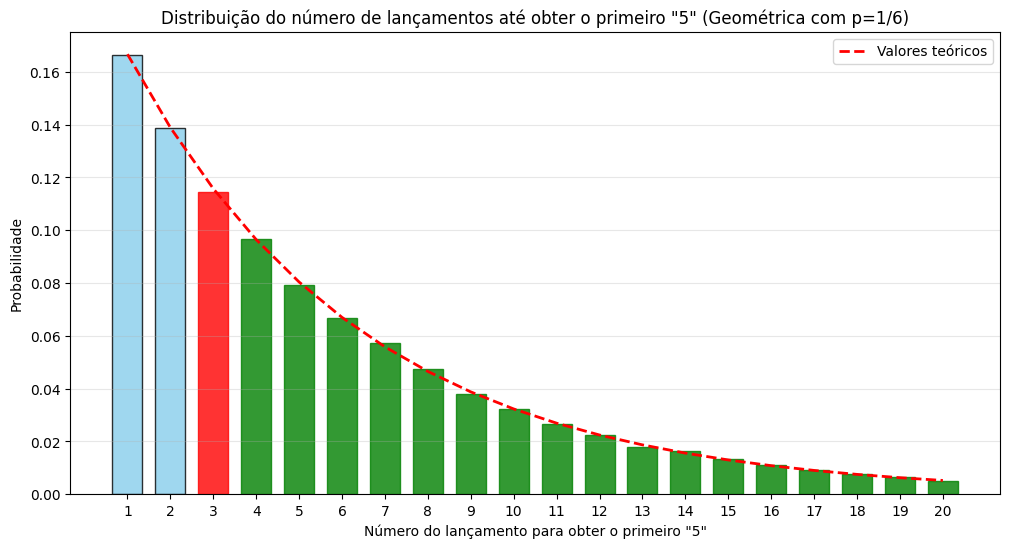

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
N = 100000  # Número de amostras
p = 1/6  # Probabilidade de sucesso (1/6 para obter o número "5" em um dado justo)
av = np.array([])  # Array para armazenar os resultados

# Gerar distribuição geométrica
for i in range(N):
    c = 1  # Contador de lançamentos até o sucesso (começando em 1)
    x = np.random.uniform(0, 1)  # Gerar um número aleatório entre 0 e 1
    while x > p:  # Enquanto não obtiver sucesso (x > p significa falha)
        c += 1
        x = np.random.uniform(0, 1)  # Gerar um novo número aleatório
    av = np.append(av, c)  # Adicionar o resultado ao array

# a) Probabilidade de ganhar exatamente no terceiro lançamento
count_3 = 0
for valor in av:
    if valor == 3:
        count_3 += 1
prob_3 = count_3 / N

print("\na) Probabilidade de ganhar exatamente no terceiro lançamento:")
print(f"   Simulação: {prob_3:.4f}")
# Cálculo analítico: P(X=3) = (1-p)^(3-1) * p = (1-p)^2 * p
prob_teorica_3 = ((1-p)**(3-1)) * p
print(f"   Valor teórico: {prob_teorica_3:.4f}")

# b) Probabilidade de precisar lançar o dado pelo menos 4 vezes
count_pelo_menos_4 = 0
for valor in av:
    if valor >= 4:
        count_pelo_menos_4 += 1
prob_pelo_menos_4 = count_pelo_menos_4 / N

print("\nb) Probabilidade de precisar lançar o dado pelo menos 4 vezes:")
print(f"   Simulação: {prob_pelo_menos_4:.4f}")
# Cálculo analítico: P(X>=4) = (1-p)^(4-1) = (1-p)^3
prob_teorica_pelo_menos_4 = (1-p)**3
print(f"   Valor teórico: {prob_teorica_pelo_menos_4:.4f}")

# c) Média e desvio padrão de X
media_simulacao = np.mean(av)
desvio_padrao_simulacao = np.std(av)

print("\nc) Estatísticas da variável aleatória X:")
print(f"   Média (simulação): {media_simulacao:.4f}")
# Cálculo analítico da média: E[X] = 1/p
media_teorica = 1/p
print(f"   Média (teórica): {media_teorica:.4f}")

print(f"   Desvio padrão (simulação): {desvio_padrao_simulacao:.4f}")
# Cálculo analítico do desvio padrão: σ[X] = sqrt((1-p)/p²)
desvio_padrao_teorico = np.sqrt((1-p)/(p**2))
print(f"   Desvio padrão (teórico): {desvio_padrao_teorico:.4f}")

# Visualização dos resultados
plt.figure(figsize=(12, 6))
max_lancamentos = 20  # Limite para o gráfico
freq = np.zeros(max_lancamentos + 1)

for valor in av:
    if valor <= max_lancamentos:
        freq[int(valor)] += 1

# Plotar histograma
barras = plt.bar(range(1, max_lancamentos + 1), freq[1:]/N, width=0.7,
                alpha=0.8, color='skyblue', edgecolor='black')
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Número do lançamento para obter o primeiro "5"')
plt.ylabel('Probabilidade')
plt.title('Distribuição do número de lançamentos até obter o primeiro "5" (Geométrica com p=1/6)')
plt.xticks(range(1, max_lancamentos + 1))

# Destacar as barras de interesse
barras[2].set_color('red')  # Destacar a barra para o terceiro lançamento
for i in range(3, max_lancamentos):
    barras[i].set_color('green')  # Destacar as barras para lançamentos >= 4

# Adicionar os valores teóricos como linha
x_teorico = np.arange(1, max_lancamentos + 1)
y_teorico = [(1-p)**(k-1) * p for k in x_teorico]
plt.plot(x_teorico, y_teorico, 'r--', linewidth=2, label='Valores teóricos')

plt.legend()
plt.show()

EXERCICIO 7

Estatísticas da simulação:
Média (simulação): 0.749825
Média (teórica): 0.750000
Variância (simulação): 0.037642
Variância (teórica): 0.037500


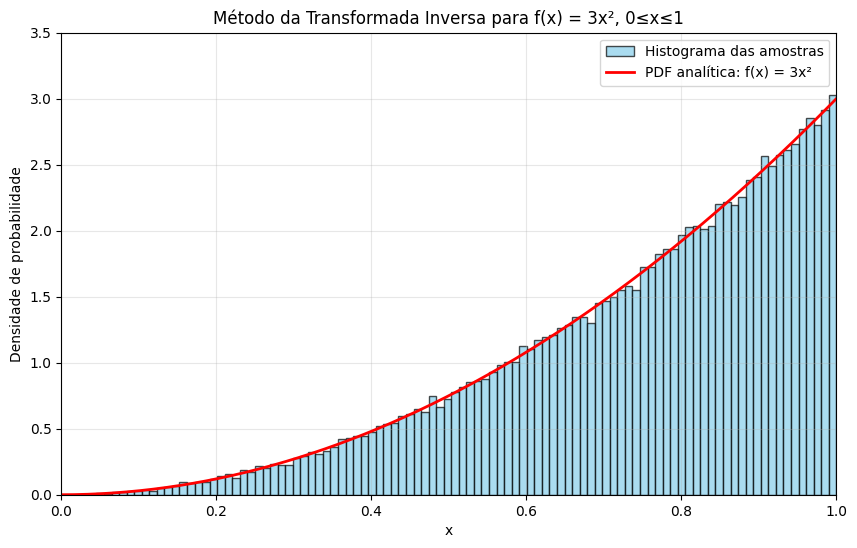

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Método da transformada inversa para f(x) = 3x², 0≤x≤1
N = 100000  # Número de amostras
av = np.array([])  # Array para armazenar os resultados

# Passo 1: Encontrar a função de distribuição acumulada (CDF)
# F(x) = ∫(0 a x) 3t² dt = x³ para 0≤x≤1

# Passo 2: Encontrar a inversa da CDF
# y = x³ => x = y^(1/3) = ∛y

# Passo 3: Gerar amostras usando a transformada inversa
for i in range(N):
    u = np.random.uniform(0, 1)  # Gerar um número aleatório uniforme entre 0 e 1
    x = np.cbrt(u)  # Transformada inversa: x = u^(1/3)
    av = np.append(av, x)  # Adicionar o resultado ao array

# Verificar a média e a variância das amostras geradas
media_simulacao = np.mean(av)
media_teorica = 3/4  # Para f(x) = 3x², E[X] = 3/4
variancia_simulacao = np.var(av)
variancia_teorica = 3/80  # Para f(x) = 3x², Var[X] = 3/80 = 0.0375

print("Estatísticas da simulação:")
print(f"Média (simulação): {media_simulacao:.6f}")
print(f"Média (teórica): {media_teorica:.6f}")
print(f"Variância (simulação): {variancia_simulacao:.6f}")
print(f"Variância (teórica): {variancia_teorica:.6f}")

# Plotar o histograma normalizado e a PDF analítica
plt.figure(figsize=(10, 6))

# Histograma normalizado
plt.hist(av, bins=100, density=True, alpha=0.7,
         color='skyblue', edgecolor='black', label='Histograma das amostras')

# PDF analítica: f(x) = 3x²
x_plot = np.linspace(0, 1, 1000)
pdf = 3 * (x_plot ** 2)
plt.plot(x_plot, pdf, 'r-', linewidth=2, label='PDF analítica: f(x) = 3x²')

# Formatação do gráfico
plt.grid(alpha=0.3)
plt.xlabel('x')
plt.ylabel('Densidade de probabilidade')
plt.title('Método da Transformada Inversa para f(x) = 3x², 0≤x≤1')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 3.5)
plt.show()


EXERCICIO 8

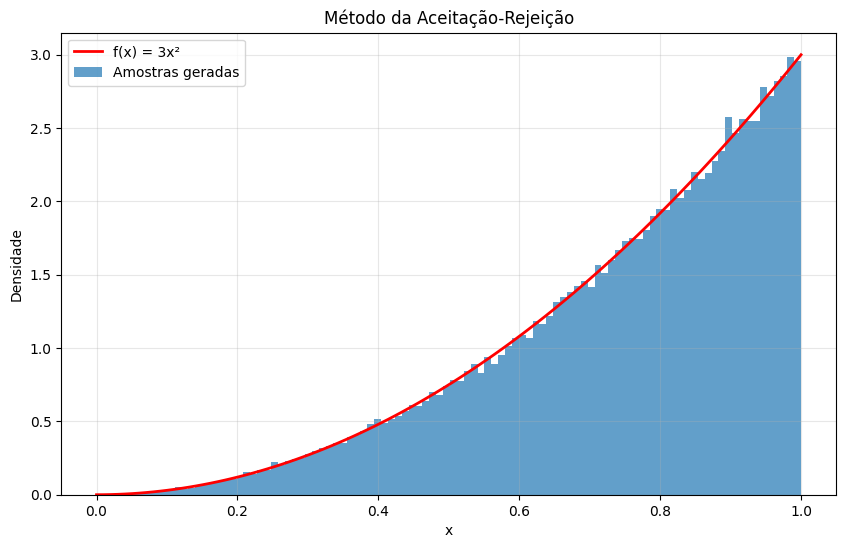

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
n = 100000  # Número de amostras
xfunction = np.array([])  # Array para armazenar amostras

# Método da aceitação-rejeição para f(x) = 3x²
for i in range(n):
    # Gerar dois números aleatórios uniformes
    x1 = np.random.uniform(0, 1)  # Candidato Y
    x2 = np.random.uniform(0, 1)  # Uniforme U para comparação

    # Aceitar apenas se x2 < x1²
    while (x2 >= (x1*x1)):
        x1 = np.random.uniform(0, 1)
        x2 = np.random.uniform(0, 1)
    xfunction = np.append(xfunction, x1)

# Pontos para a curva teórica
X = np.linspace(0, 1, 100)  # Valores de x mais suaves
fx = 3 * X**2  # PDF analítica: f(x) = 3x²

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(X, fx, 'r-', linewidth=2, label='f(x) = 3x²')
plt.hist(xfunction, bins=100, density=True, alpha=0.7, label='Amostras geradas')
plt.xlabel('x')
plt.ylabel('Densidade')
plt.title('Método da Aceitação-Rejeição')
plt.legend()
plt.grid(alpha=0.3)
plt.show()